### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('drive/MyDrive/Machine Learning Course/datasources/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Маємо 29 колонок і 2240 рядків. Пропущені значення наявні лише в колонці Income (24 рядки не мають значень у цій колонці).

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

<Axes: >

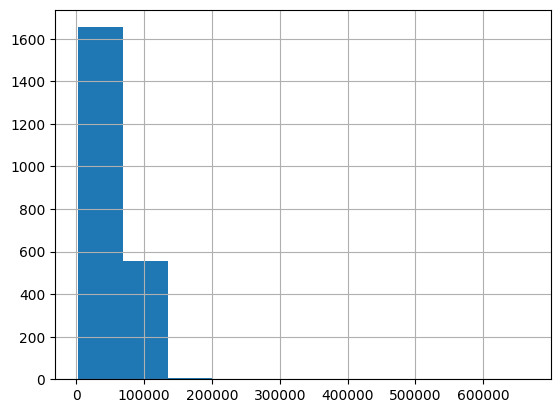

In [41]:
df['Income'].hist()

In [42]:
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


Оскільки середнє та медіана дуже близькі, а кількість відсутність значень невелика (1.1%), я пропоную їх заповнити медіаною (можна також заповнити значеннями, яких немає у датасеті, наприклад, -1, але це може створити штучні кластери і потрібно буде додатково аналізувати, чи нам це підходить).

In [43]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [45]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [46]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


Оскільки категорій небагато, то пропоную для колонок Marital_Status та Education застосуємо one-hot encoding:

In [47]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Education'])

Також бачимо, що колонка Dt_Customer у форматі object. Перетворимо її на datetime, а для кластеризації створимо фічі, які відповідно вказуватимуть на рік та місяць реєстрації клієнта у компанії.

In [48]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [49]:
df['Dt_Customer_year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_month'] = df['Dt_Customer'].dt.month

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [50]:
X = df.drop(columns=['ID', 'Dt_Customer'])

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [52]:
labels = model.labels_

silhouette_score(X, labels)

np.float64(0.5383702591843208)

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [53]:
import plotly.express as px

px.scatter_3d(X, 'Income', 'MntWines', 'NumStorePurchases', labels)

Я вирішила використати інформацію про дохід клієнтів, а також кількість покупок через стор і витрачена на вино сума.

Що я можу сказати з візуалізації:
- кластери чітко розмежовуються по доходу клієнта (2й кластер – найнижчий дохід, 1й – найвищий)
- також є декілька суттєвих викидів про доходах в 1му кластері
- клієнти з 2го кластера (найменший дохід) роблять в середньому менше покупок в сторах та витрачають найменшу суму на вино
- кластер 0 та 1 не так суттєво між собою відрізняються

Тому, на мою думку, кластери зараз розділились за доходом більше (а всі інші розбіжності вже похідні від цього).

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = KMeans(n_clusters=3, random_state=42)
model_scaled.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [55]:
labels_scaled = model.labels_

silhouette_score(X_scaled, labels_scaled)

np.float64(0.049709636072300355)

Метрика силуету вже суттєво відрізняється після масштабування: вона знизилась з 0.54 до 0.05, що означає, що кластери дуже перекриваються.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [56]:
X['Income'].quantile([0.5, 0.75, 0.9, 0.99, 0.999])

,Income
0.500,51381.50
0.750,68289.75
0.900,79800.30
0.990,94437.68
0.999,160069.27


Я пропоную видалити 1% даних (клієнтів, у яких похід >= 99-го персентиля), бо це явні викиди.

In [57]:
X = X[X['Income'] < X['Income'].quantile(0.99)]

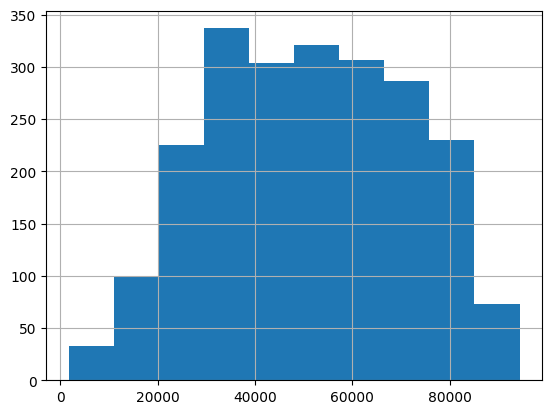

In [59]:
X['Income'].hist();

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

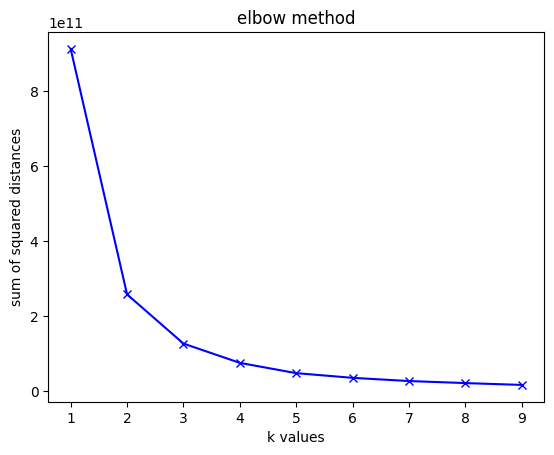

In [60]:
import matplotlib.pyplot as plt

K = range(1, 10)
sum_of_squared_distances = []

for k in K:
  model = KMeans(n_clusters=k, n_init='auto').fit(X)
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k values')
plt.ylabel('sum of squared distances')
plt.title('elbow method')
plt.show()

In [61]:
labels = KMeans(n_clusters=4).fit(X).labels_
silhouette_score(X, labels)

np.float64(0.5392400916156838)

In [62]:
px.scatter_3d(X, 'Income', 'MntWines', 'NumStorePurchases', labels)

Все ще дуже чітко йде кластеризація за доходом.

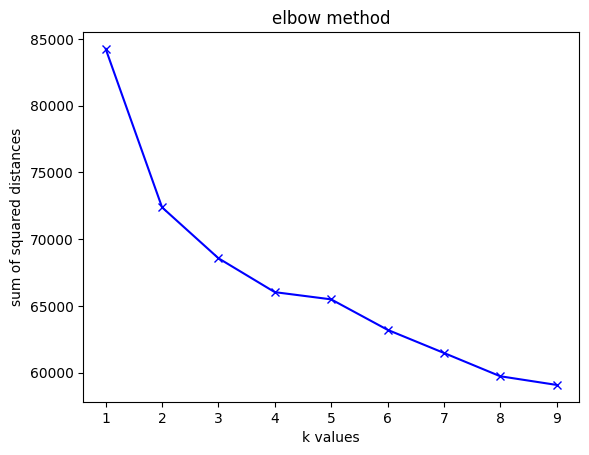

In [63]:
K = range(1, 10)
sum_of_squared_distances = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in K:
  model = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k values')
plt.ylabel('sum of squared distances')
plt.title('elbow method')
plt.show()

In [65]:
labels = KMeans(n_clusters=4).fit(X_scaled).labels_
silhouette_score(X, labels)

np.float64(0.25657822551742754)

Все одно результат метрики для масштабованих даних доволі низький.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

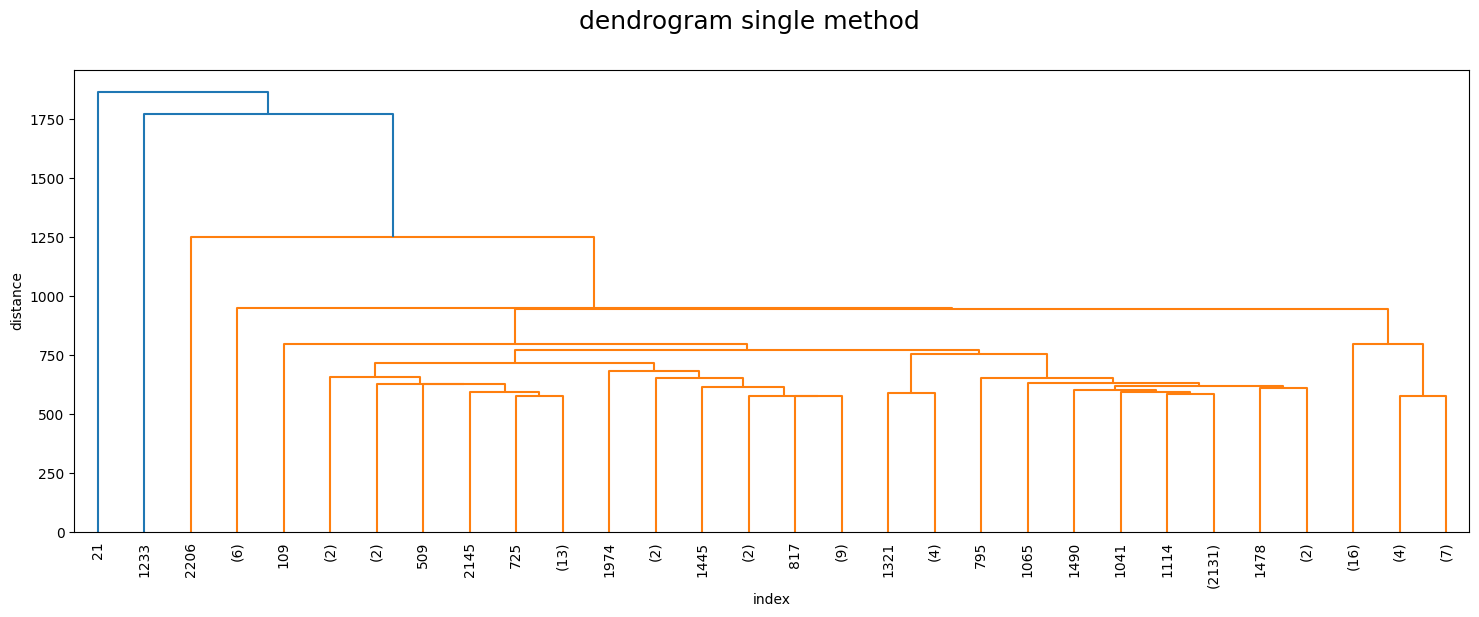

In [67]:
dist_sin = linkage(X, method='single')

plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('index')
plt.ylabel('distance')
plt.suptitle('dendrogram single method', fontsize=18)
plt.show()

Я бачу, що виділяється 3 кластери.

In [68]:
X['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

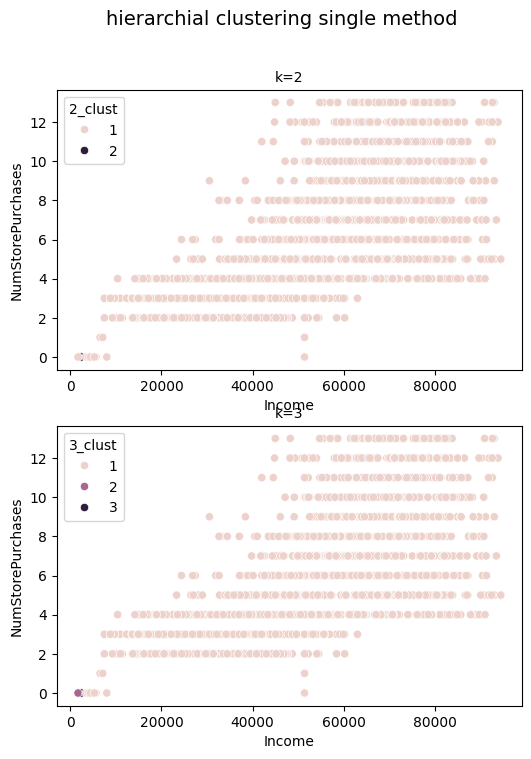

In [69]:
import seaborn as sns

plt.figure(figsize=(6, 8))
plt.suptitle('hierarchial clustering single method', fontsize=14)

plt.subplot(2, 1, 1)
plt.title('k=2', fontsize=10)
sns.scatterplot(x='Income', y='NumStorePurchases', data=X, hue='2_clust')

plt.subplot(2, 1, 2)
plt.title('k=3', fontsize=10)
sns.scatterplot(x='Income', y='NumStorePurchases', data=X, hue='3_clust')

plt.show()

In [70]:
X['2_clust'].value_counts()

,count
2_clust,
1,2216
2,1


In [71]:
X['3_clust'].value_counts()

,count
3_clust,
1,2215
3,1
2,1


Бачу, що для ієрархічної аглоремативної кластеризації при розділенні на 2 чи 3 кластера ми виділяємо лише 1 юзера для кластера – це дуже поганий підхід.

In [72]:
X[X['2_clust'] == 2]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Dt_Customer_year,Dt_Customer_month,2_clust,3_clust
21,1979,2447.0,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,False,False,False,True,False,False,False,False,False,False,True,False,False,2013,1,2,3


In [86]:
X['NumCatalogPurchases'].value_counts()

,count
NumCatalogPurchases,
0,581
1,496
2,276
3,182
4,182
5,138
6,125
7,77
8,53


Цей клієнт єдиний, що зробив 28 покупок за каталогом. Спробуємо його виключити і перебудувати.

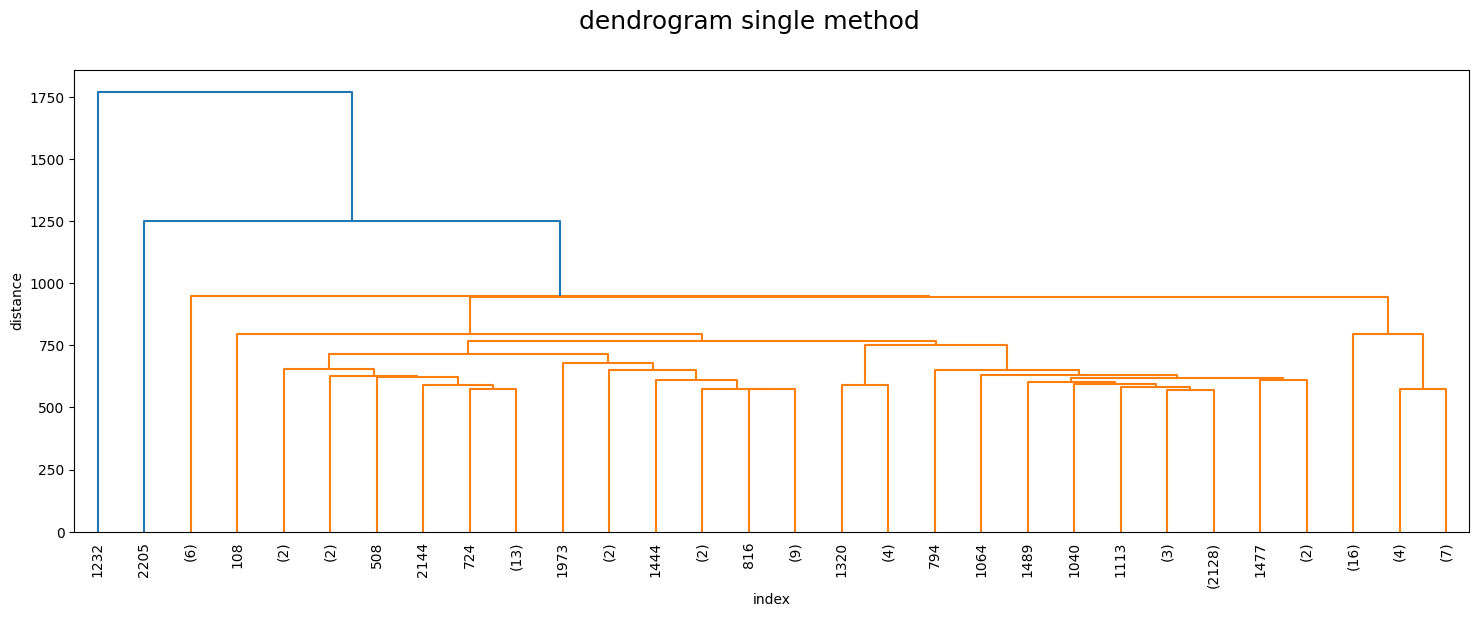

In [87]:
X = X[X['NumCatalogPurchases'] != 28]

dist_sin = linkage(X, method='single')

plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('index')
plt.ylabel('distance')
plt.suptitle('dendrogram single method', fontsize=18)
plt.show()

In [89]:
X['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

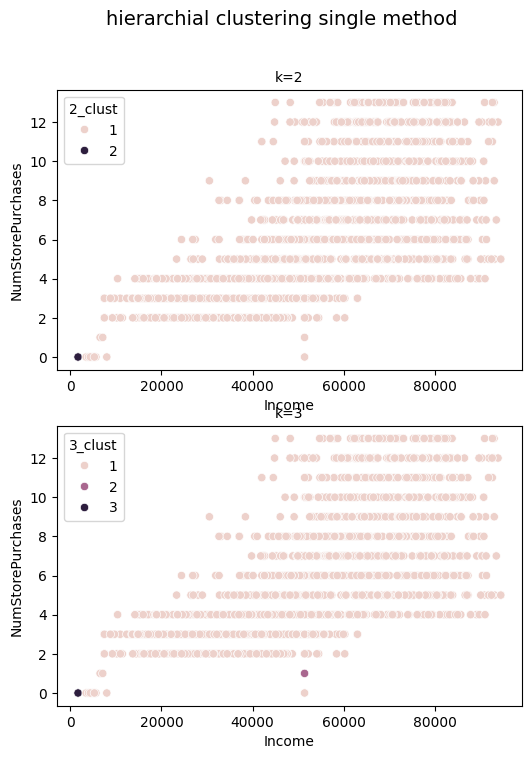

In [90]:
plt.figure(figsize=(6, 8))
plt.suptitle('hierarchial clustering single method', fontsize=14)

plt.subplot(2, 1, 1)
plt.title('k=2', fontsize=10)
sns.scatterplot(x='Income', y='NumStorePurchases', data=X, hue='2_clust')

plt.subplot(2, 1, 2)
plt.title('k=3', fontsize=10)
sns.scatterplot(x='Income', y='NumStorePurchases', data=X, hue='3_clust')

plt.show()

На жаль, суттєво краще не стало... Треба дутальніше досліджувати дані.

In [91]:
silhouette_score(X, X['2_clust'])

np.float64(0.43417471976352673)

In [92]:
silhouette_score(X, X['3_clust'])

np.float64(-0.3677362994045855)

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [93]:
from sklearn.cluster import DBSCAN

In [101]:
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(X)
labels = dbscan.labels_

silhouette_score(X, labels)

np.float64(-0.7503444663585122)

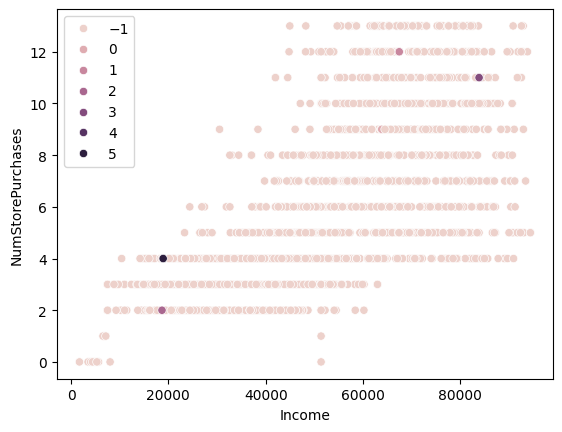

In [103]:
sns.scatterplot(x='Income', y='NumStorePurchases', data=X, hue=labels);

На мою думку, ця кластеризація може бути корисна для пошуку викидів серед клієнтів – для побудови кластеризації самих клієнтів вона не підходить.